In [4]:
import pandas as pd
read_file1= pd.read_csv (r'C:\\Users\\revan\\Documents\\Linear_regression\new-thyroid.data')
read_file1.to_csv (r'C:\\Users\\revan\\Documents\\Linear_regression\new-thyroid.csv',index=None)
read_file1

,Class_attribute,T3-resin,Total_Serumthyroxin,Totalserum_triiodothyronine,basal_thyroid,Maxab_diff
0,1,113,9.9,3.1,2.0,5.9
1,1,127,12.9,2.4,1.4,0.6
2,1,109,5.3,1.6,1.4,1.5
3,1,105,7.3,1.5,1.5,-0.1
4,1,105,6.1,2.1,1.4,7.0
...,...,...,...,...,...,...
209,3,118,6.5,1.3,1.7,11.5
210,3,139,4.2,0.7,4.3,6.3
211,3,103,5.1,1.4,1.2,5.0
212,3,97,4.7,1.1,2.1,12.6


In [2]:
#logistic regression
# Import necessary libraries
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize variables to store the best feature combination and highest accuracy
best_features = None
highest_accuracy = 0.0
best_conf_matrix = None
best_class_report = None

# Iterate over each combination of two features to find the one with the best accuracy
for feature1, feature2 in combinations(X.columns, 2):
    X_features = X[[feature1, feature2]]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42, stratify=y)
    
    # Create and train the logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this combination gives the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_features = (feature1, feature2)
        best_conf_matrix = confusion_matrix(y_test, y_pred)
        best_class_report = classification_report(y_test, y_pred)

# Print the results for the best feature combination
print(f"Best Feature Combination: {best_features}")
print(f"Highest Accuracy: {highest_accuracy:.4f}")
print("Confusion Matrix:")
print(best_conf_matrix)
print("Classification Report:")
print(best_class_report)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Best Feature Combination: ('Glucose', 'BMI')
Highest Accuracy: 0.7143
Confusion Matrix:
[[84 16]
 [28 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.62      0.48      0.54        54

    accur

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize variables to store the best feature and highest accuracy
best_feature = None
highest_accuracy = 0.0
best_conf_matrix = None
best_class_report = None

# Iterate over each feature to find the one with the best accuracy
for feature in X.columns:
    X_feature = X[[feature]]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42, stratify=y)
    
    # Create and train the logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this feature gives the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_feature = feature
        best_conf_matrix = confusion_matrix(y_test, y_pred)
        best_class_report = classification_report(y_test, y_pred)

# Print the results for the best feature
print(f"Best Feature: {best_feature}")
print(f"Highest Accuracy: {highest_accuracy:.4f}")
print("Confusion Matrix:")
print(best_conf_matrix)
print("Classification Report:")
print(best_class_report)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Best Feature: Glucose
Highest Accuracy: 0.7078
Confusion Matrix:
[[85 15]
 [30 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       100
           1       0.62      0.44      0.52        54

    accuracy                    

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(data)




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.7143
Confusion Matrix:
[[82 18]
 [26 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro

In [18]:
#linear regression

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Best Pseudo-Accuracy: 0.8116883116883117
Best Feature: Age
Best Target: Pregnancies


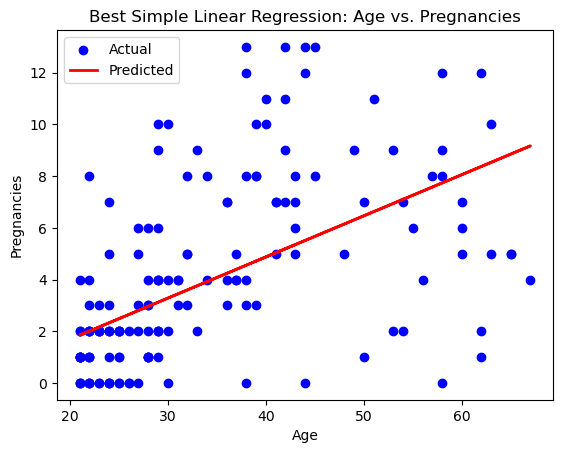

In [1]:
#important
#linear regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import combinations

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Get all columns except the target
features = column_names[:-1]  # Exclude the 'Outcome' column

# Initialize variables to keep track of the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_target = None
best_model = None

# Iterate over all possible combinations of features and targets
for target in features:
    for feature in features:
        if feature != target:
            # Select the feature and target
            X = data[[feature]]
            y = data[target]

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Normalize the features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train the linear regression model
            linear_model = LinearRegression()
            linear_model.fit(X_train_scaled, y_train)
            y_continuous_pred = linear_model.predict(X_test_scaled)

            # Convert continuous predictions to binary outcomes using median threshold
            median_threshold = np.median(y_train)
            y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
            y_binary_test = (y_test > median_threshold).astype(int)

            # Calculate pseudo-accuracy for linear regression
            linear_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

            # Update the best accuracy and corresponding features if current accuracy is better
            if linear_accuracy > best_accuracy:
                best_accuracy = linear_accuracy
                best_features = feature
                best_target = target
                best_model = linear_model

# Print the best accuracy and corresponding features
print(f"Best Pseudo-Accuracy: {best_accuracy}")
print(f"Best Feature: {best_features}")
print(f"Best Target: {best_target}")

# Plot the best regression line
X = data[[best_features]]
y = data[best_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_continuous_pred = best_model.predict(X_test_scaled)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_continuous_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel(best_features)
plt.ylabel(best_target)
plt.title(f'Best Simple Linear Regression: {best_features} vs. {best_target}')
plt.legend()
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Linear Regression Pseudo-Accuracy with Normalization: 0.42207792207792205
Median Threshold: 42.5


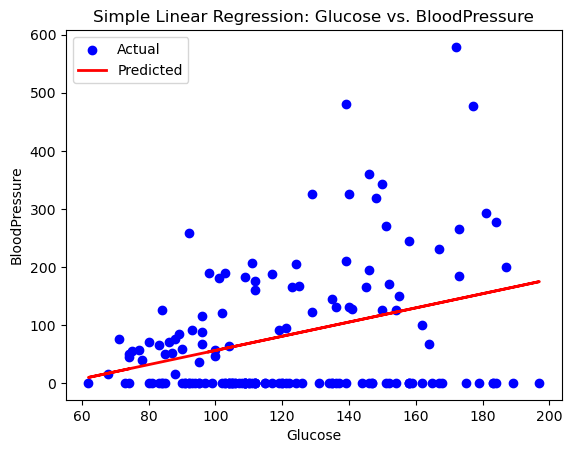

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select 'Glucose' as the feature and 'BloodPressure' as the target for simple linear regression
X = data[['Glucose']]
y = data['Insulin']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_continuous_pred = linear_model.predict(X_test_scaled)

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for linear regression
linear_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

print(f"Linear Regression Pseudo-Accuracy with Normalization: {linear_accuracy}")
print(f"Median Threshold: {median_threshold}")

# Optional: Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_continuous_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Simple Linear Regression: Glucose vs. BloodPressure')
plt.legend()
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error: 492.9912
R-squared: 0.0137


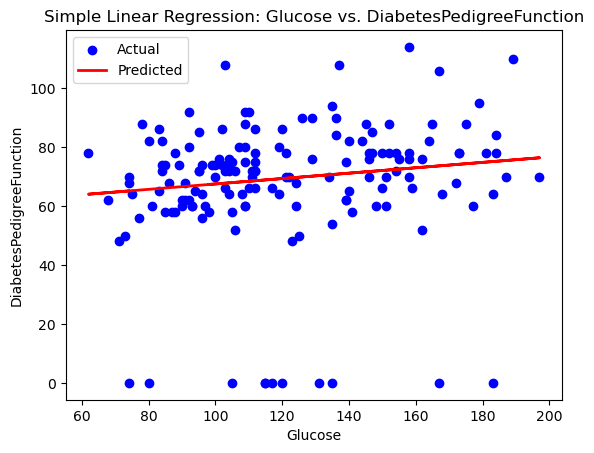

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error: 0.0939
R-squared: 0.0111


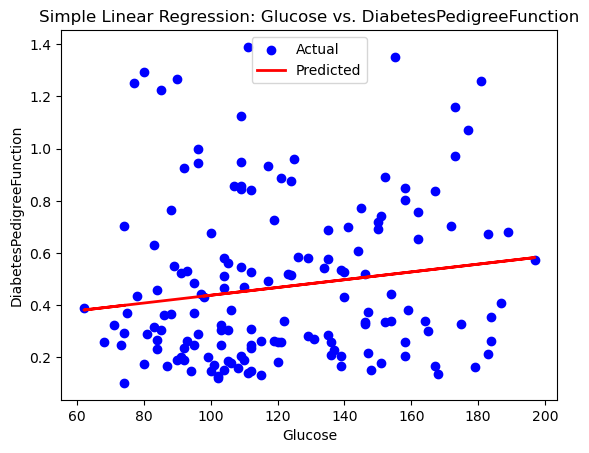

Accuracy-like Metric: 0.92


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select 'Glucose' as the feature and 'DiabetesPedigreeFunction' as the target for simple linear regression
X = data[['Glucose']]
y = data['BloodPressure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('Simple Linear Regression: Glucose vs. DiabetesPedigreeFunction')
plt.legend()
plt.show()

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select 'Glucose' as the feature and 'DiabetesPedigreeFunction' as the target for simple linear regression
X = data[['Glucose']]
y = data['DiabetesPedigreeFunction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('Simple Linear Regression: Glucose vs. DiabetesPedigreeFunction')
plt.legend()
plt.show()

# Define a tolerance level for rounding predictions
tolerance = 0.5 # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Best Pseudo-Accuracy: 0.7727272727272727
Best Features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Best Target: Pregnancies


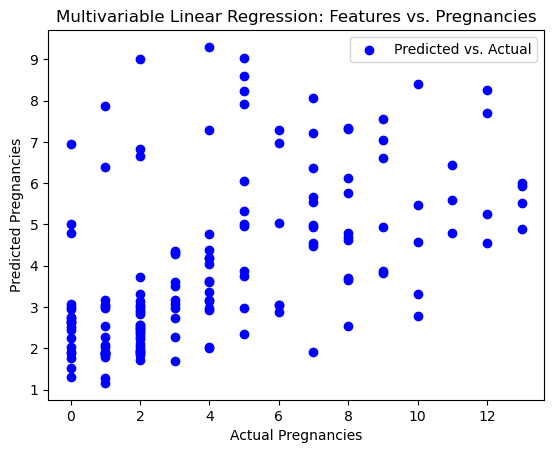

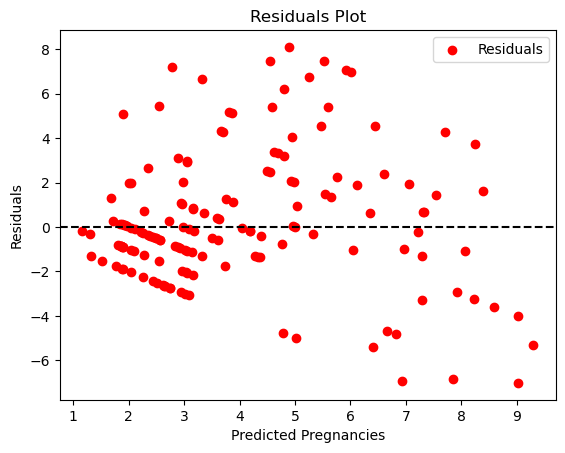

In [5]:
#multivariable regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Initialize variables to keep track of the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_target = None
best_model = None

# Iterate over all possible target variables
for target in column_names:
    # Skip 'Outcome' as target as it is binary
    if target == 'Outcome':
        continue

    # Use all other columns as features except the target
    features = [col for col in column_names if col != target]
    X = data[features]
    y = data[target]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_continuous_pred = linear_model.predict(X_test_scaled)

    # Convert continuous predictions to binary outcomes using median threshold
    median_threshold = np.median(y_train)
    y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
    y_binary_test = (y_test > median_threshold).astype(int)

    # Calculate pseudo-accuracy for linear regression
    linear_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

    # Update the best accuracy and corresponding features if current accuracy is better
    if linear_accuracy > best_accuracy:
        best_accuracy = linear_accuracy
        best_features = features
        best_target = target
        best_model = linear_model

# Print the best accuracy and corresponding features
print(f"Best Pseudo-Accuracy: {best_accuracy}")
print(f"Best Features: {best_features}")
print(f"Best Target: {best_target}")

# Re-train the model with the best features and target to plot the results
X = data[best_features]
y = data[best_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_continuous_pred = best_model.predict(X_test_scaled)

# Plot the actual vs predicted values
plt.scatter(y_test, y_continuous_pred, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual ' + best_target)
plt.ylabel('Predicted ' + best_target)
plt.title(f'Multivariable Linear Regression: Features vs. {best_target}')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - y_continuous_pred
plt.scatter(y_continuous_pred, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted ' + best_target)
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error: 0.0836
R-squared: 0.1196


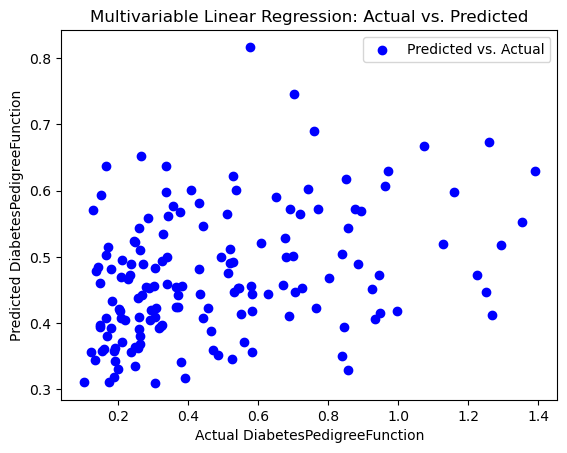

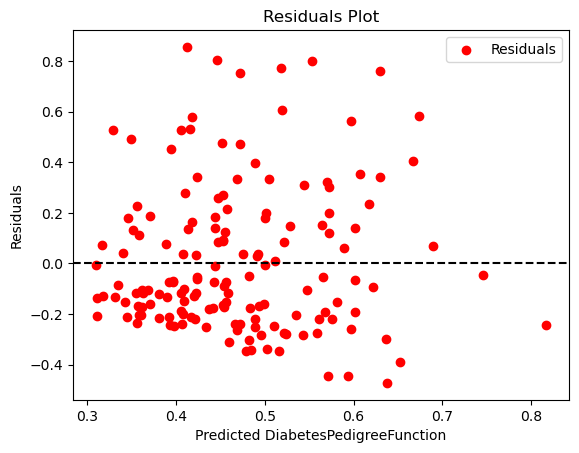

Accuracy-like Metric: 0.92


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select features for multivariable linear regression
X = data.drop('DiabetesPedigreeFunction', axis=1)  # Use all features except the target
y = data['DiabetesPedigreeFunction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual DiabetesPedigreeFunction')
plt.ylabel('Predicted DiabetesPedigreeFunction')
plt.title('Multivariable Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted DiabetesPedigreeFunction')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

# Define a tolerance level for rounding predictions
tolerance = 0.5 # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error: 7.7547
R-squared: 0.3867
Polynomial Regression Pseudo-Accuracy with Normalization: 0.7792207792207793
Median Threshold: 3.0


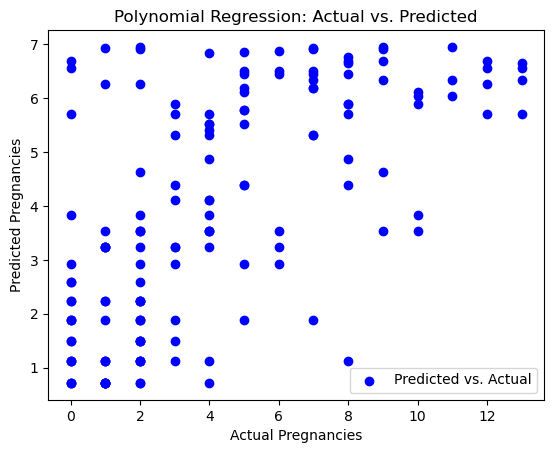

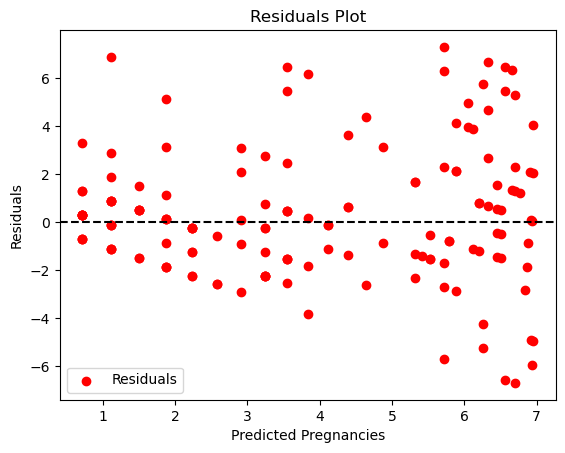

In [10]:
#polynomial regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select 'Age' as the feature and 'Pregnancies' as the target for polynomial regression
X = data[['Age']]
y = data['Pregnancies']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform features to polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and train the polynomial regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Make predictions
y_continuous_pred = lin_reg.predict(X_test_poly)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_continuous_pred)
r2 = r2_score(y_test, y_continuous_pred)

# Print the regression metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_poly = (y_continuous_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for polynomial regression
poly_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_poly)

print(f"Polynomial Regression Pseudo-Accuracy with Normalization: {poly_accuracy}")
print(f"Median Threshold: {median_threshold}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_continuous_pred, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Pregnancies')
plt.ylabel('Predicted Pregnancies')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - y_continuous_pred
plt.scatter(y_continuous_pred, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Pregnancies')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error: 0.1080
R-squared: -0.1376


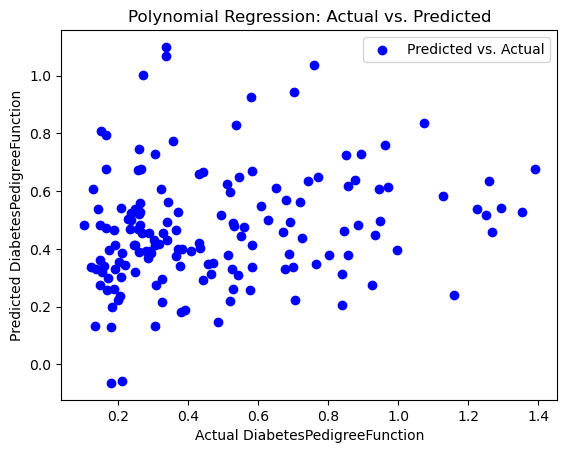

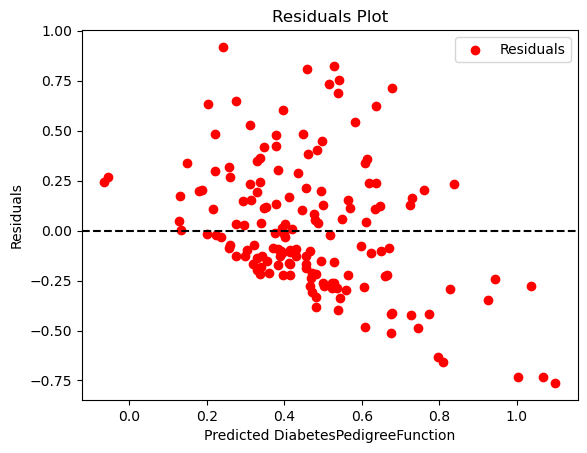

Accuracy-like Metric: 0.88


In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Select features for polynomial regression
X = data.drop('DiabetesPedigreeFunction', axis=1)  # Use all features except the target
y = data['DiabetesPedigreeFunction']

# Transform features to polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create and train the polynomial regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual DiabetesPedigreeFunction')
plt.ylabel('Predicted DiabetesPedigreeFunction')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted DiabetesPedigreeFunction')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()
# Define a tolerance level for rounding predictions
tolerance = 0.5 # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data"
column_names = [
    'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick',
    'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG',
    'referral_source', 'class'
]

data = pd.read_csv(url, names=column_names, na_values='?')

# Drop rows with missing values except for TBG
data.dropna(subset=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
                    'query_hyperthyroid', 'goitre', 'hypopituitary', 'TSH', 'TT4', 'FTI', 'referral_source',
                    'class'], inplace=True)

# Encode categorical variables
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data = pd.get_dummies(data, columns=[
    'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick',
    'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
    'goitre', 'hypopituitary', 'psych', 'referral_source'
])

# Convert class labels to binary (negative vs. hyperthyroid)
data['class'] = data['class'].map({'negative.': 0, 'hyperthyroid.': 1})

# Split the data into features and target
X = data.drop(columns=['class'])
y = data['class']

# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs again in X and corresponding rows in y
missing_indices = X.index[X.isnull().any(axis=1)]
X.drop(index=missing_indices, inplace=True)
y = y.loc[X.index]

# Check if X and y are not empty
if len(X) == 0:
    raise ValueError("After dropping NaN values, X is empty. Adjust data preprocessing steps.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


ValueError: After dropping NaN values, X is empty. Adjust data preprocessing steps.

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the thyroid dataset from OpenML
df = fetch_openml('thyroid', version=1, as_frame=True)
data = df.frame

# Explore the dataset
print(data.head())
print(data.describe())
print(data.info())


OpenMLError: Dataset thyroid with version 1 not found.

In [5]:
# read_file9 =[(read_file1 != '3').all(axis=1)].copy()
# 
# read_file1['1'] = read_file1['1'].loc.replace(3, 2)
read_file1= read_file1.iloc[0:184]
read_file1


,Class_attribute,T3-resin,Total_Serumthyroxin,Totalserum_triiodothyronine,basal_thyroid,Maxab_diff
0,1,113,9.9,3.1,2.0,5.9
1,1,127,12.9,2.4,1.4,0.6
2,1,109,5.3,1.6,1.4,1.5
3,1,105,7.3,1.5,1.5,-0.1
4,1,105,6.1,2.1,1.4,7.0
...,...,...,...,...,...,...
179,2,88,16.5,4.9,0.8,0.1
180,2,97,15.1,1.8,1.2,-0.2
181,2,106,13.4,3.0,1.1,0.0
182,2,79,19.0,5.5,0.9,0.3


##### 185-214

In [97]:
x = read_file1.iloc[:,[2]].values
y = read_file1.iloc[:,0].values


In [98]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)
xtrain.reshape(-1, 1)           


array([[ 9.5],
       [ 7.8],
       [ 5.9],
       [ 7.8],
       [11.1],
       [ 7.5],
       [16.4],
       [ 6.7],
       [ 8.1],
       [ 8. ],
       [10.6],
       [ 9.2],
       [ 8.9],
       [ 7.6],
       [ 7.7],
       [14.2],
       [ 6.5],
       [16.1],
       [12.4],
       [ 7.8],
       [11.1],
       [14.7],
       [16.5],
       [ 8.4],
       [15.1],
       [ 8.6],
       [10. ],
       [ 5.3],
       [ 8.1],
       [ 9.5],
       [11.5],
       [ 8.1],
       [11.3],
       [ 9.5],
       [ 8.5],
       [22.3],
       [13. ],
       [13.4],
       [10.6],
       [ 8.4],
       [ 7.5],
       [15.2],
       [12.2],
       [ 9.1],
       [ 9.1],
       [ 6.7],
       [ 6.3],
       [11.9],
       [ 9.4],
       [11.3],
       [ 8.1],
       [11.4],
       [ 9.7],
       [ 7.1],
       [10.1],
       [18.5],
       [ 6.5],
       [10.1],
       [ 8.4],
       [ 6.7],
       [ 8.1],
       [ 8. ],
       [11.9],
       [ 7.1],
       [ 7.3],
       [19. ],
       [18

In [99]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain.reshape(-1, 1))
xtest = sc_x.transform(xtest.reshape(-1, 1))
  
print (xtrain[0:10, :])

[[-0.28454213]
 [-0.69583963]
 [-1.15552506]
 [-0.69583963]
 [ 0.1025614 ]
 [-0.76842154]
 [ 1.38484183]
 [-0.9619733 ]
 [-0.62325772]
 [-0.64745169]]


In [100]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [101]:
from sklearn.metrics import confusion_matrix
  

y_pred = classifier.predict(xtest) 
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[37  0]
 [ 1  8]]


In [102]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))



Accuracy :  0.9782608695652174


In [103]:
read_file1


,Class_attribute,T3-resin,Total_Serumthyroxin,Totalserum_triiodothyronine,basal_thyroid,Maxab_diff
0,1,113,9.9,3.1,2.0,5.9
1,1,127,12.9,2.4,1.4,0.6
2,1,109,5.3,1.6,1.4,1.5
3,1,105,7.3,1.5,1.5,-0.1
4,1,105,6.1,2.1,1.4,7.0
...,...,...,...,...,...,...
179,2,88,16.5,4.9,0.8,0.1
180,2,97,15.1,1.8,1.2,-0.2
181,2,106,13.4,3.0,1.1,0.0
182,2,79,19.0,5.5,0.9,0.3


In [104]:
# dataMapping3={'1':0,'2':1,'3':1}

In [105]:
# read_file1['1']=read_file1['1'].map(dataMapping3)
# read_file1

In [106]:
x1 = read_file1.iloc[:,[2,3,4]].values
y1 = read_file1.iloc[:,0].values


In [107]:
from sklearn.model_selection import train_test_split
  
x1train, x1test, y1train, ytest = train_test_split(
    x1, y1, test_size=0.25, random_state=0)
x1train.reshape(-1, 1)           


array([[ 9.5],
       [ 2.9],
       [ 1.4],
       [ 7.8],
       [ 2. ],
       [ 1.8],
       [ 5.9],
       [ 1.7],
       [ 2. ],
       [ 7.8],
       [ 1.2],
       [ 1. ],
       [11.1],
       [ 2. ],
       [ 0.7],
       [ 7.5],
       [ 1.2],
       [ 1.3],
       [16.4],
       [ 3.8],
       [ 1.1],
       [ 6.7],
       [ 1.5],
       [ 1. ],
       [ 8.1],
       [ 1.7],
       [ 0.6],
       [ 8. ],
       [ 1.7],
       [ 2.1],
       [10.6],
       [ 0.8],
       [ 2.1],
       [ 9.2],
       [ 1.6],
       [ 1.5],
       [ 8.9],
       [ 0.7],
       [ 1. ],
       [ 7.6],
       [ 1.8],
       [ 2. ],
       [ 7.7],
       [ 1.8],
       [ 1.9],
       [14.2],
       [ 3.6],
       [ 1.5],
       [ 6.5],
       [ 1. ],
       [ 0.9],
       [16.1],
       [ 0.9],
       [ 1.3],
       [12.4],
       [ 2.3],
       [ 1.7],
       [ 7.8],
       [ 2. ],
       [ 1. ],
       [11.1],
       [ 2. ],
       [ 1. ],
       [14.7],
       [ 7.8],
       [ 0.6],
       [16

In [108]:
from sklearn.model_selection import train_test_split
  
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.25, random_state=0)
x1train

array([[ 9.5,  2.9,  1.4],
       [ 7.8,  2. ,  1.8],
       [ 5.9,  1.7,  2. ],
       [ 7.8,  1.2,  1. ],
       [11.1,  2. ,  0.7],
       [ 7.5,  1.2,  1.3],
       [16.4,  3.8,  1.1],
       [ 6.7,  1.5,  1. ],
       [ 8.1,  1.7,  0.6],
       [ 8. ,  1.7,  2.1],
       [10.6,  0.8,  2.1],
       [ 9.2,  1.6,  1.5],
       [ 8.9,  0.7,  1. ],
       [ 7.6,  1.8,  2. ],
       [ 7.7,  1.8,  1.9],
       [14.2,  3.6,  1.5],
       [ 6.5,  1. ,  0.9],
       [16.1,  0.9,  1.3],
       [12.4,  2.3,  1.7],
       [ 7.8,  2. ,  1. ],
       [11.1,  2. ,  1. ],
       [14.7,  7.8,  0.6],
       [16.5,  4.9,  0.8],
       [ 8.4,  1.5,  0.8],
       [15.1,  1.8,  1.2],
       [ 8.6,  1.6,  1.6],
       [10. ,  1.7,  1.5],
       [ 5.3,  1.6,  1.4],
       [ 8.1,  1.4,  0.5],
       [ 9.5,  1.4,  1.1],
       [11.5,  1.5,  1.9],
       [ 8.1,  2.3,  1. ],
       [11.3,  2.3,  0.9],
       [ 9.5,  1.8,  1.6],
       [ 8.5,  1.8,  0.8],
       [22.3,  3.3,  1.3],
       [13. ,  3.6,  0.7],
 

In [109]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x1train = sc_x.fit_transform(x1train)
x1test = sc_x.transform(x1test)
print (x1train)


[[-0.28454213  0.4544603   0.22995043]
 [-0.69583963 -0.14664693  0.99460485]
 [-1.15552506 -0.34701601  1.37693206]
 [-0.69583963 -0.68096448 -0.534704  ]
 [ 0.1025614  -0.14664693 -1.10819482]
 [-0.76842154 -0.68096448  0.03878682]
 [ 1.38484183  1.05556754 -0.34354039]
 [-0.9619733  -0.4805954  -0.534704  ]
 [-0.62325772 -0.34701601 -1.29935843]
 [-0.64745169 -0.34701601  1.56809567]
 [-0.01840846 -0.94812325  1.56809567]
 [-0.35712404 -0.41380571  0.42111403]
 [-0.42970595 -1.01491294 -0.534704  ]
 [-0.74422757 -0.28022632  1.37693206]
 [-0.7200336  -0.28022632  1.18576846]
 [ 0.85257448  0.92198815  0.42111403]
 [-1.01036124 -0.81454386 -0.72586761]
 [ 1.31225992 -0.88133356  0.03878682]
 [ 0.41708301  0.05372214  0.80344125]
 [-0.69583963 -0.14664693 -0.534704  ]
 [ 0.1025614  -0.14664693 -0.534704  ]
 [ 0.97354433  3.72715526 -1.29935843]
 [ 1.4090358   1.79025416 -0.91703121]
 [-0.5506758  -0.4805954  -0.91703121]
 [ 1.07032021 -0.28022632 -0.15237679]
 [-0.50228786 -0.41380571

In [110]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1train, y1train)


LogisticRegression(random_state=0)

In [111]:
y1_pred = classifier.predict(x1test)


In [112]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y1test, y1_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[37  0]
 [ 0  9]]


In [113]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(y1test, y1_pred))

Accuracy :  1.0


In [114]:
x2 = read_file1.iloc[:,2].values
y2= read_file1.iloc[:,0].values


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Reshape X to a column vector
X = x2.reshape(-1, 1)

# Degree of polynomial
degree = 2

# Transform the features to include polynomial terms up to the specified degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y2)



# Predict
y2_pred = model.predict(X_poly)

## Calculate the mean squared error
mse = mean_squared_error(y2, y2_pred)
mse


0.05655541424532092

In [116]:
accuracy=1-mse

In [117]:
accuracy

0.943444585754679

In [118]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data
X4 =read_file1.iloc[:,[2]].values
y4 = read_file1.iloc[:,0].values

# Reshape X to a column vector
X = X4.reshape(-1, 1)

# Initialize and fit a simple linear regression model
model = LinearRegression()
model.fit(X, y4)

# Predict
y4_pred = model.predict(X)

# Calculate evaluation metrics
#simple linear regression
mse = mean_squared_error(y4, y4_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.06


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X =read_file1.iloc[:,[2]].values
y = read_file1.iloc[:,0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train.reshape(-1,1), y_train)

# Make probability predictions on the test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate Mean Squared Error (MSE) for probability predictions
mse = mean_squared_error(y_test, y_prob)
print(f"Mean Squared Error (MSE) for Logistic Regression: {mse}")


Mean Squared Error (MSE) for Logistic Regression: 1.0255295652936263


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X = read_file1.iloc[:,[2,3,4]].values
y = read_file1.iloc[:,0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = logistic_regression.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_prob)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9973976394788895


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
x = read_file1.iloc[:,2].values
y = read_file1.iloc[:,0].values
X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial feature transformation
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Define a threshold for classification
threshold = 0.5  # Adjust as needed

# Convert continuous predictions to binary labels
y_pred_binary = (y_pred >= threshold).astype(int)

# Calculate accuracy as a measure of classification performance
accuracy = np.mean(y_pred_binary == y_test)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.7567567567567568


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X =read_file1.iloc[:,2].values
y = read_file1.iloc[:,0].values

X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make continuous predictions on the test data
y_pred_continuous = model.predict(X_test)

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred_continuous)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Accuracy-like Metric: 0.97
